#Natural Language Processing with Disaster Tweets
#Our aim in this project is to predict which Tweets are about real disasters and which ones are not.
#Provided by : Sina Ainesazi Dovom

##Importing the required packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from nltk.stem import PorterStemmer
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
from wordcloud import WordCloud
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


##Data Preparation

###Loading the Data

In [2]:
train_df = pd.read_csv("https://www.math.unipd.it/~dasan/disaster/train.csv", sep = ",")
test_df = pd.read_csv("https://www.math.unipd.it/~dasan/disaster/test.csv", sep = ",")


In [3]:
print(train_df.shape)
train_df.head()

(7613, 5)


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
train_df.isnull().any(axis=0)

id          False
keyword      True
location     True
text        False
target      False
dtype: bool

In [5]:
train_df[train_df["location"] != "NaN"]

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


###Dropping some useless columns

In [6]:
train_df = train_df.drop(columns = ["id", "keyword", "location"], axis=0)

In [7]:
train_df.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


###Checking to see if data is balanced

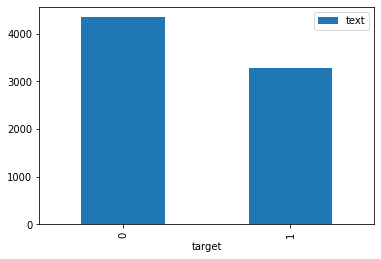

In [8]:
train_df.groupby("target").count().plot.bar(ylim=0)
plt.show()

### Use of worldcloud to see which words are common

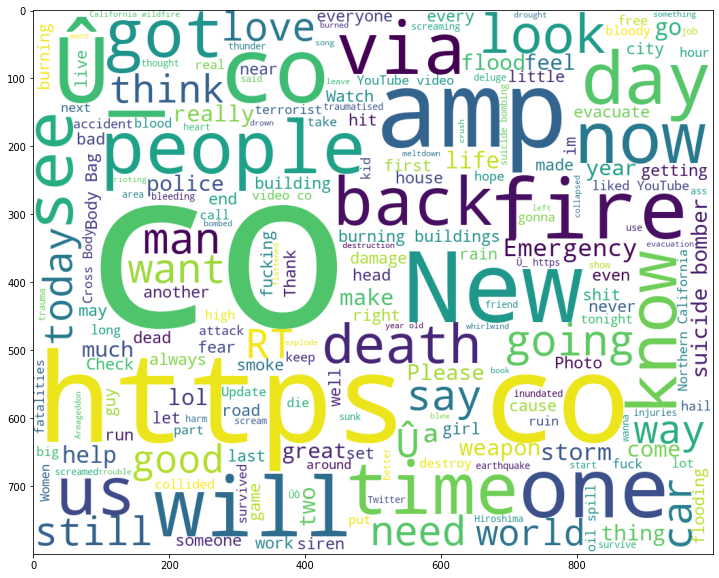

In [9]:
wordcloud = WordCloud(background_color="white",width=1000, height=800).generate(' '.join(train_df['text'].tolist()))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)

## Preprocessing the raw text



In [10]:
stemmer = PorterStemmer()

In [11]:
words = stopwords.words("english")
more_stop_words=["https","tco","co","via","s","rt","st","w","RT", "im","re","Û","û_https","m","û","d","v","a","b","c","e","f","g","h","lol","l","n","o","p","k","q","r","s","t","u","v","w","ll","ve","co","nt"]
words.extend(more_stop_words)

In [12]:
train_df["processedtext"] = train_df["text"].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

In [13]:
train_df.head()
print(train_df["text"][0])
print(train_df["processedtext"][0])

Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
our deed reason earthquak may allah forgiv us


In [14]:
del train_df["text"]

In [15]:
target = train_df["target"]

### Splitting the data into train and validation data sets
### Vectorizing the data

In [16]:
X_train, X_valid, y_train, y_valid = train_test_split(train_df["processedtext"], target, train_size = 0.75, random_state = 123)

In [17]:
print(train_df.shape); print(X_train.shape); print(X_valid.shape)

(7613, 2)
(5709,)
(1904,)


In [18]:
vectorizer_tfidf = TfidfVectorizer()

train_tfIdf = vectorizer_tfidf.fit_transform(X_train)

valid_tfIdf = vectorizer_tfidf.transform(X_valid)

In [19]:
print(train_tfIdf.shape); print(valid_tfIdf.shape)

(5709, 15535)
(1904, 15535)


# Using different methods

### Logistic Regression classifier

In [20]:
classifier_LR = LogisticRegression()
classifier_LR.fit(train_tfIdf, y_train)

predLR_train = classifier_LR.predict(train_tfIdf) 
accuracy_LR_train = metrics.accuracy_score(y_train, predLR_train)
Conf_metrics_LR_train = metrics.confusion_matrix(y_train, predLR_train)

predLR_valid = classifier_LR.predict(valid_tfIdf) 
accuracy_LR_valid = metrics.accuracy_score(y_valid, predLR_valid)
Conf_metrics_LR_valid = metrics.confusion_matrix(y_valid, predLR_valid)

print(f"LogisticRegression.\tTraining Accuracy: {accuracy_LR_train}\tValidation Accuracy: {accuracy_LR_valid}")
print(f"Confusion matrix training:\n {Conf_metrics_LR_train}\nConfusion matrix valididation:\n {Conf_metrics_LR_valid}")

LogisticRegression.	Training Accuracy: 0.8957785952005605	Validation Accuracy: 0.7909663865546218
Confusion matrix training:
 [[3159   86]
 [ 509 1955]]
Confusion matrix valididation:
 [[951 146]
 [252 555]]


### Logistic Regression with different Hyperparameters

LogisticRegression. C= 0.001.	Training Accuracy: 0.5684007707129094	Validation Accuracy: 0.5761554621848739
LogisticRegression. C= 0.01.	Training Accuracy: 0.5684007707129094	Validation Accuracy: 0.5761554621848739
LogisticRegression. C= 0.1.	Training Accuracy: 0.7524960588544404	Validation Accuracy: 0.7473739495798319
LogisticRegression. C= 0.5.	Training Accuracy: 0.8661762129970223	Validation Accuracy: 0.7872899159663865
LogisticRegression. C= 1.0.	Training Accuracy: 0.8957785952005605	Validation Accuracy: 0.7909663865546218
LogisticRegression. C= 5.	Training Accuracy: 0.9642669469259064	Validation Accuracy: 0.7914915966386554
LogisticRegression. C= 10.	Training Accuracy: 0.9861622000350324	Validation Accuracy: 0.7909663865546218
LogisticRegression. C= 15.	Training Accuracy: 0.9905412506568576	Validation Accuracy: 0.7888655462184874
LogisticRegression. C= 20.	Training Accuracy: 0.9931686810299527	Validation Accuracy: 0.7851890756302521
LogisticRegression. C= 100.	Training Accuracy: 0

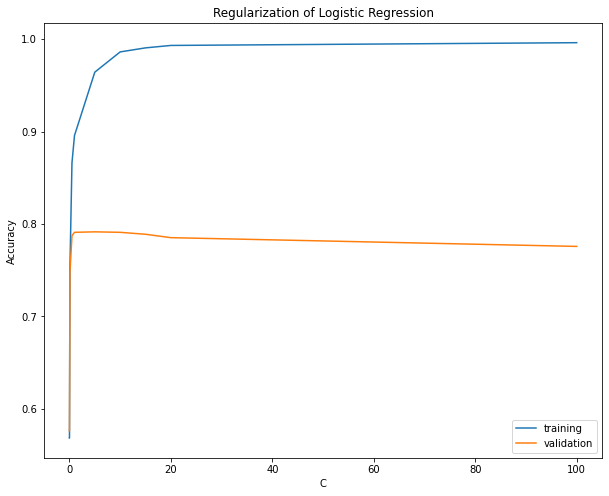

In [21]:
C = [0.001, 0.01, 0.1, 0.5, 1., 5, 10, 15, 20, 100]
Training_Accuracy_LR_H = []
Validation_Accuracy_LR_H = []
for c in C:
    classifier_LR_H = LogisticRegression(C = c, max_iter = 200)
    classifier_LR_H.fit(train_tfIdf, y_train)

    predLR_H_train = classifier_LR_H.predict(train_tfIdf)
    accuracy_LR_H_train = metrics.accuracy_score(y_train, predLR_H_train)
    Training_Accuracy_LR_H.append(accuracy_LR_H_train)
    predLR_H_valid = classifier_LR_H.predict(valid_tfIdf)
    accuracy_LR_H_valid= metrics.accuracy_score(y_valid, predLR_H_valid)
    Validation_Accuracy_LR_H.append(accuracy_LR_H_valid)
    print(f"LogisticRegression. C= {c}.\tTraining Accuracy: {accuracy_LR_H_train}\tValidation Accuracy: {accuracy_LR_H_valid}")

fig = plt.figure(figsize=(10, 8))
plt.plot(C,Training_Accuracy_LR_H, label="training")
plt.plot(C,Validation_Accuracy_LR_H, label="validation")
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("Regularization of Logistic Regression")
plt.legend()
plt.show()

### Random Forest Classifier

In [22]:
classifier_RF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 123)
classifier_RF.fit(train_tfIdf, y_train)

predRF_train = classifier_RF.predict(train_tfIdf) 
accuracy_RF_train = metrics.accuracy_score(y_train, predRF_train)
Conf_metrics_RF_train = metrics.confusion_matrix(y_train, predRF_train)

predRF_valid = classifier_RF.predict(valid_tfIdf) 
accuracy_RF_valid = metrics.accuracy_score(y_valid, predRF_valid)
Conf_metrics_RF_valid = metrics.confusion_matrix(y_valid, predRF_valid)

print(f"RandomForestClassifier.\tTraining Accuracy: {accuracy_RF_train}\tValidation Accuracy: {accuracy_RF_valid}")
print(f"Confusion matrix training:\n {Conf_metrics_RF_train}\nConfusion matrix valididation:\n {Conf_metrics_RF_valid}")

RandomForestClassifier.	Training Accuracy: 0.9735505342441758	Validation Accuracy: 0.7857142857142857
Confusion matrix training:
 [[3233   12]
 [ 139 2325]]
Confusion matrix valididation:
 [[990 107]
 [301 506]]


### K Nearest Neighbor Classifier

KNeighborsClassifier. K= 1.	Training Accuracy: 0.9956209493781748	Validation Accuracy: 0.7211134453781513
KNeighborsClassifier. K= 2.	Training Accuracy: 0.8449816079873883	Validation Accuracy: 0.7442226890756303
KNeighborsClassifier. K= 3.	Training Accuracy: 0.8624978104746891	Validation Accuracy: 0.7473739495798319
KNeighborsClassifier. K= 4.	Training Accuracy: 0.8281660535995796	Validation Accuracy: 0.7641806722689075
KNeighborsClassifier. K= 5.	Training Accuracy: 0.8395515852163251	Validation Accuracy: 0.7599789915966386
KNeighborsClassifier. K= 6.	Training Accuracy: 0.8176563321071991	Validation Accuracy: 0.773109243697479
KNeighborsClassifier. K= 7.	Training Accuracy: 0.8283412156244526	Validation Accuracy: 0.7762605042016807
KNeighborsClassifier. K= 8.	Training Accuracy: 0.815204063758977	Validation Accuracy: 0.7762605042016807
KNeighborsClassifier. K= 9.	Training Accuracy: 0.8216850586792783	Validation Accuracy: 0.779936974789916
KNeighborsClassifier. K= 10.	Training Accuracy: 0

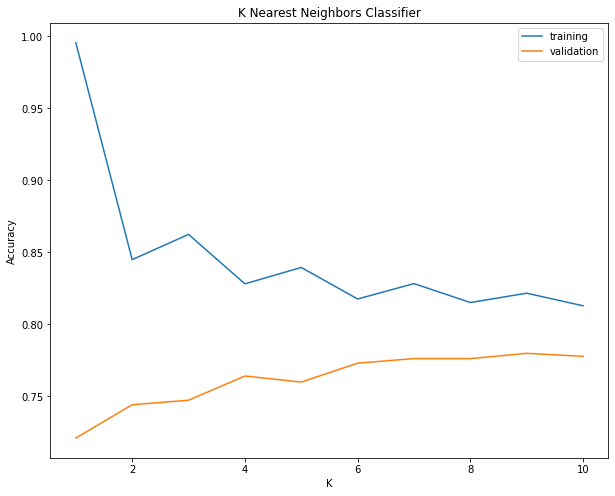

In [23]:
K = range(1, 11)
Training_Accuracy_KNN = []
Validation_Accuracy_KNN = []

for k in K:
    classifier_KNN = KNeighborsClassifier(n_neighbors=k)
    classifier_KNN.fit(train_tfIdf, y_train)

    predKNN_train = classifier_KNN.predict(train_tfIdf)
    accuracy_KNN_train = metrics.accuracy_score(y_train, predKNN_train)
    Training_Accuracy_KNN.append(accuracy_KNN_train)

    predKNN_valid = classifier_KNN.predict(valid_tfIdf)
    accuracy_KNN_valid= metrics.accuracy_score(y_valid, predKNN_valid)
    Validation_Accuracy_KNN.append(accuracy_KNN_valid)
    print(f"KNeighborsClassifier. K= {k}.\tTraining Accuracy: {accuracy_KNN_train}\tValidation Accuracy: {accuracy_KNN_valid}")
    
fig = plt.figure(figsize=(10, 8))
plt.plot(K, Training_Accuracy_KNN, label="training")
plt.plot(K, Validation_Accuracy_KNN, label="validation")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("K Nearest Neighbors Classifier")
plt.legend()
plt.show()

### Support Vector Machine with linear function and C = 1

In [24]:
classifier_SVM = SVC(kernel = 'linear', random_state = 123, C = 1)
classifier_SVM.fit(train_tfIdf, y_train)
predSVM_train = classifier_SVM.predict(train_tfIdf)
accuracy_SVM_train = metrics.accuracy_score(y_train, predSVM_train)
Conf_metrics_SVM_train = metrics.confusion_matrix(y_train, predSVM_train)

predSVM_valid = classifier_SVM.predict(valid_tfIdf)
accuracy_SVM_valid = metrics.accuracy_score(y_valid, predSVM_valid)
Conf_metrics_SVM_valid = metrics.confusion_matrix(y_valid, predSVM_valid)

print(f"SupportVectorMachine.\tTraining Accuracy: {accuracy_SVM_train}\tValidation Accuracy: {accuracy_SVM_valid}")
print(f"Confusion matrix training:\n {Conf_metrics_SVM_train}\nConfusion matrix valididation:\n {Conf_metrics_SVM_valid}")

SupportVectorMachine.	Training Accuracy: 0.9358906988964792	Validation Accuracy: 0.8004201680672269
Confusion matrix training:
 [[3171   74]
 [ 292 2172]]
Confusion matrix valididation:
 [[943 154]
 [226 581]]


### Support Vector Machine with rbf function and different values for constant C

In [25]:
C = [0.1, 1., 1.5, 10]
for c in C :
  classifier_SVM_rbf = SVC(kernel = 'rbf', random_state = 123, C = c)
  classifier_SVM_rbf.fit(train_tfIdf, y_train)
  predSVM_rbf_train = classifier_SVM_rbf.predict(train_tfIdf)
  accuracy_SVM_rbf_train = metrics.accuracy_score(y_train, predSVM_rbf_train)
  predSVM_rbf_valid = classifier_SVM_rbf.predict(valid_tfIdf)
  accuracy_SVM_rbf_valid = metrics.accuracy_score(y_valid, predSVM_rbf_valid)
  print(f"SupportVectorMachine with C= {c}.\tTraining Accuracy: {accuracy_SVM_rbf_train}\tValidation Accuracy: {accuracy_SVM_rbf_valid}")

SupportVectorMachine with C= 0.1.	Training Accuracy: 0.5871431073743213	Validation Accuracy: 0.604516806722689
SupportVectorMachine with C= 1.0.	Training Accuracy: 0.9728498861446838	Validation Accuracy: 0.7977941176470589
SupportVectorMachine with C= 1.5.	Training Accuracy: 0.9889647924330005	Validation Accuracy: 0.7983193277310925
SupportVectorMachine with C= 10.	Training Accuracy: 0.9963215974776668	Validation Accuracy: 0.7930672268907563


# Preparaing the Test data set and Vectorizing it

In [26]:
test_df = test_df.drop(columns = ["id", "keyword", "location"], axis=0)
test_df["processedtext"] = test_df["text"].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())
del test_df["text"]
test_tfIdf = vectorizer_tfidf.transform(test_df["processedtext"])

# Prediction on test data set with the used algorithms

In [27]:
sample_submission_LR = pd.read_csv("https://www.math.unipd.it/~dasan/disaster/sample_submission.csv", sep = ",")
sample_submission_LR["target"] = classifier_LR.predict(test_tfIdf)
sample_submission_LR.to_csv("submission_LR.csv", index=False)

In [28]:
final_LR_H = LogisticRegression(C = 1, max_iter = 200)
final_LR_H.fit(train_tfIdf, y_train)
sample_submission_LR_H = pd.read_csv("https://www.math.unipd.it/~dasan/disaster/sample_submission.csv", sep = ",")
sample_submission_LR_H["target"] = final_LR_H.predict(test_tfIdf)
sample_submission_LR_H.to_csv("submission_LR_H.csv", index=False)

In [29]:
sample_submission_RF = pd.read_csv("https://www.math.unipd.it/~dasan/disaster/sample_submission.csv", sep = ",")
sample_submission_RF["target"] = classifier_RF.predict(test_tfIdf)
sample_submission_RF.to_csv("submission_RF.csv", index=False)

In [30]:
final_KNN = KNeighborsClassifier(n_neighbors=10)
final_KNN.fit(train_tfIdf, y_train)
sample_submission_KNN = pd.read_csv("https://www.math.unipd.it/~dasan/disaster/sample_submission.csv", sep = ",")
sample_submission_KNN["target"] = classifier_KNN.predict(test_tfIdf)
sample_submission_KNN.to_csv("submission_KNN.csv", index=False)

In [31]:
sample_submission_SVM = pd.read_csv("https://www.math.unipd.it/~dasan/disaster/sample_submission.csv", sep = ",")
sample_submission_SVM["target"] = classifier_SVM.predict(test_tfIdf)
sample_submission_SVM.to_csv("submission_SVM.csv", index=False)

In [32]:
final_SVM_rbf = SVC(kernel = 'rbf', random_state = 123, C = 1.)
final_SVM_rbf.fit(train_tfIdf, y_train)
sample_submission_SVM_rbf = pd.read_csv("https://www.math.unipd.it/~dasan/disaster/sample_submission.csv", sep = ",")
sample_submission_SVM_rbf["target"] = final_SVM_rbf.predict(test_tfIdf)
sample_submission_SVM_rbf.to_csv("submission_SVM_rbf.csv", index=False)